In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gossipcop_df_fake = pd.read_csv('gossipcop_fake_output_raw_id.csv')
gossipcop_df_real = pd.read_csv('gossipcop_real_output_raw_id.csv')
politifact_df_real = pd.read_csv('poitifact_fake_output_raw_id.csv')
politifact_df_fake = pd.read_csv('poitifact_real_output_raw_id.csv')

In [100]:
gossipcop_df_fake.dtypes

created_at                datetime64[ns]
user_id_str                        int64
id_str                             int64
lang                              object
location                          object
description                       object
full_text                         object
user_screen_name                  object
user_name                         object
followers_count                    int64
normal_followers_count             int64
fast_followers_count               int64
favourites_count                   int64
friends_count                      int64
media_count                        int64
statuses_count                     int64
retweeted                           bool
retweet_count                      int64
favorited                           bool
favorite_count                     int64
dtype: object

## 1) For each category dataset, provide a table describing the statistical trend of the key attributes. This consists of: <br>i) Number of tweet messages, <br>ii) Number of distinct user ids, <br>iii) mean, standard deviation, kurtosis and skewness of number of retweets per user id. <br>Discuss whether you can discriminate between fake news and real names on the basis of these attributes.

In [3]:
print('Number of distinct user ids in gossipcop fake '+str(len(gossipcop_df_fake['user_id_str'].unique())))
print('Number of distinct user ids in gossipcop real '+str(len(gossipcop_df_real['user_id_str'].unique())))
print('Number of distinct user ids in politifact fake '+str(len(politifact_df_fake['user_id_str'].unique())))
print('Number of distinct user ids in politifact real '+str(len(politifact_df_real['user_id_str'].unique())))

Number of distinct user ids in gossipcop fake 5869
Number of distinct user ids in gossipcop real 3465
Number of distinct user ids in politifact fake 3944
Number of distinct user ids in politifact real 3513


In [4]:
def get_follower_favourite_count(df, user):
    user_data = df.loc[df['user_screen_name'] == user]
    latest_update =  user_data["full_text"].iloc[-1]
    followers = user_data["followers_count"].iloc[-1]
    favourites = user_data["favourites_count"].iloc[-1]
    return followers, favourites

def get_user_data(df, users):
    user_data = []
    for user in users:
        followers, favourites = get_follower_favourite_count(df, user)
        user_data.append([user, followers, favourites])
    df = pd.DataFrame(user_data, columns=['user', 'followers', 'favourites'])
    return df

def calculate_statistics(user_data):
    import statistics
    from scipy.stats import kurtosis, skew
    mean = {'followers' : user_data['followers'].mean(), 'favourites': user_data['favourites'].mean()}
    std = {'followers' : user_data['followers'].std(), 'favourites': user_data['favourites'].std()}
    kurtosis = {'followers' : user_data['followers'].kurtosis(), 'favourites': user_data['favourites'].kurtosis()}
    skew = {'followers' : user_data['followers'].skew(), 'favourites': user_data['favourites'].skew()}
    return mean, std, kurtosis, skew

def print_statistics(user_data):
    mean, std, kurtosis, skew = calculate_statistics(user_data)
    data = [['mean', mean['followers'], mean['favourites']],
            ['std', std['followers'], std['favourites']],
            ['kurtosis', kurtosis['followers'], kurtosis['favourites']],
            ['skew', skew['followers'], skew['favourites']]]
    df = pd.DataFrame(data, columns=['statistics', 'followers', 'favourites'])
    print(df.to_string(index=False))

In [5]:
real_news = gossipcop_df_real
fake_news = gossipcop_df_fake 

user_data = get_user_data(real_news, real_news["user_screen_name"])
print("Gossipcop Real News Data: ")
print_statistics(user_data)

user_data = get_user_data(fake_news, fake_news["user_screen_name"])
print("Gossipcop Fake News Data: ")
print_statistics(user_data)

Gossipcop Real News Data: 
statistics    followers   favourites
      mean 1.097900e+05  9312.357718
       std 1.210238e+06 46281.885686
  kurtosis 5.677006e+02   217.058651
      skew 1.811486e+01    12.282866
Gossipcop Fake News Data: 
statistics    followers   favourites
      mean 3.272999e+05 35681.170566
       std 3.646276e+06 92413.976951
  kurtosis 5.678891e+02    65.093220
      skew 2.181053e+01     6.913182


In [6]:
real_news = politifact_df_real
fake_news = politifact_df_fake 

user_data = get_user_data(real_news, real_news["user_screen_name"])
print("Politifact Real News Data: ")
print_statistics(user_data)

user_data = get_user_data(fake_news, fake_news["user_screen_name"])
print("Politifact Fake News Data: ")
print_statistics(user_data)

Politifact Real News Data: 
statistics    followers   favourites
      mean 9.680508e+04 35512.049305
       std 2.357307e+06 82873.025558
  kurtosis 1.252652e+03    65.073854
      skew 3.455083e+01     6.029922
Politifact Fake News Data: 
statistics    followers    favourites
      mean 4.113219e+05  40123.752693
       std 5.198846e+06 124623.714313
  kurtosis 2.954838e+02    132.169450
      skew 1.656974e+01      9.680933


## 2) Draw on the same plot the distribution of follower count for Fake News and Real News of glossipcop and politifact data. Repeat the process for the distribution of followee count for fake news and Real News

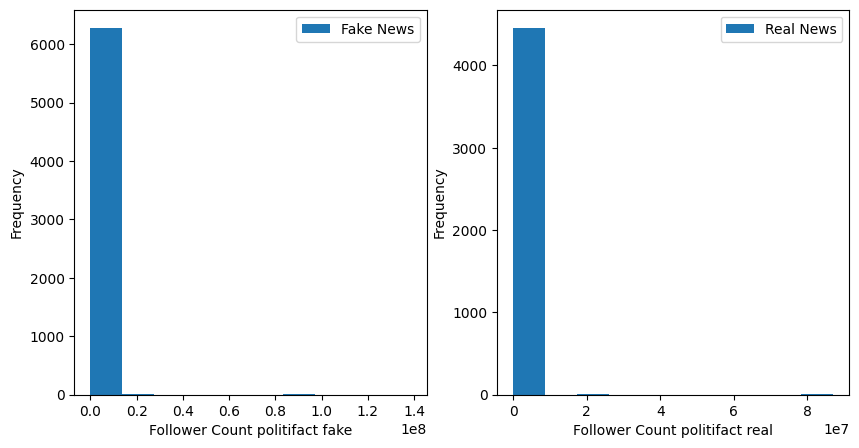

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
#df = pd.read_csv('glossipcop_data.csv')

# Filter the data to separate the fake news and real news
fake_news = politifact_df_fake.copy()
real_news = politifact_df_real.copy()

# Plot the distribution of follower count for each category
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(fake_news['followers_count'], bins=10, alpha=1, label='Fake News')
plt.xlabel('Follower Count politifact fake')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
plt.hist(real_news['followers_count'], bins=10, alpha=1, label='Real News')
plt.xlabel('Follower Count politifact real')
plt.ylabel('Frequency')
plt.legend()
plt.show()


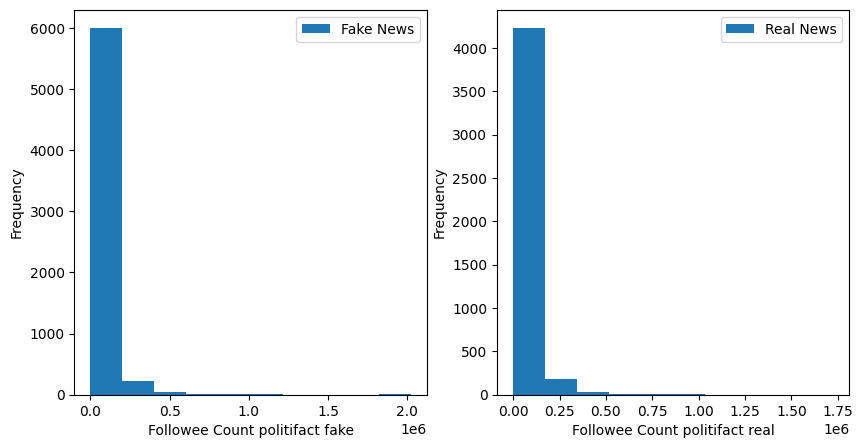

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
#df = pd.read_csv('glossipcop_data.csv')

# Filter the data to separate the fake news and real news
fake_news = politifact_df_fake.copy()
real_news = politifact_df_real.copy()

# Plot the distribution of follower count for each category
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(fake_news['favourites_count'], bins=10, alpha=1, label='Fake News')
plt.xlabel('Followee Count politifact fake')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
plt.hist(real_news['favourites_count'], bins=10, alpha=1, label='Real News')
plt.xlabel('Followee Count politifact real')
plt.ylabel('Frequency')
plt.legend()
plt.show()


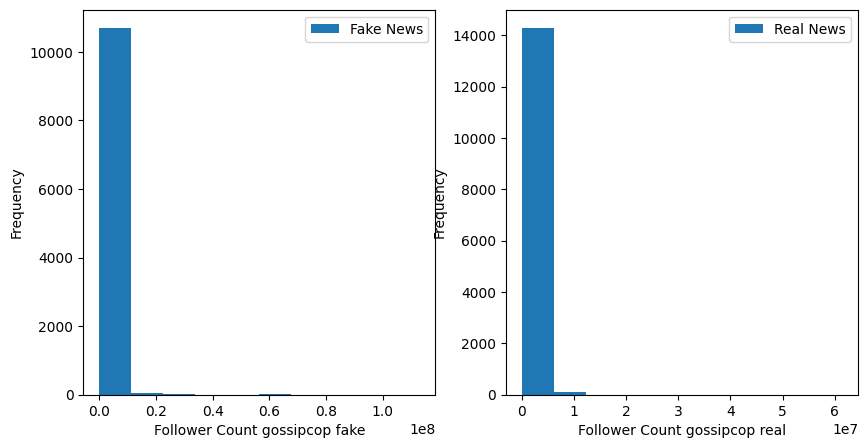

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
#df = pd.read_csv('glossipcop_data.csv')

# Filter the data to separate the fake news and real news
fake_news = gossipcop_df_fake.copy()
real_news = gossipcop_df_real.copy()

# Plot the distribution of follower count for each category
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(fake_news['followers_count'], bins=10, alpha=1, label='Fake News')
plt.xlabel('Follower Count gossipcop fake')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
plt.hist(real_news['followers_count'], bins=10, alpha=1, label='Real News')
plt.xlabel('Follower Count gossipcop real')
plt.ylabel('Frequency')
plt.legend()
plt.show()

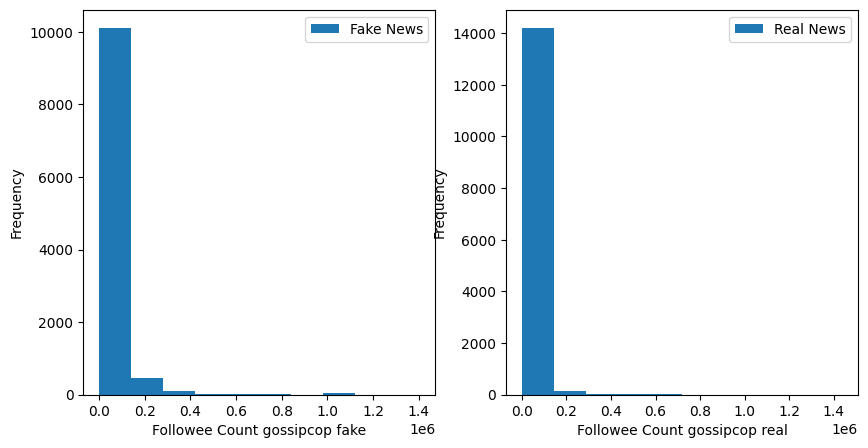

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
#df = pd.read_csv('glossipcop_data.csv')

# Filter the data to separate the fake news and real news
fake_news = gossipcop_df_fake.copy()
real_news = gossipcop_df_real.copy()

# Plot the distribution of follower count for each category
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(fake_news['favourites_count'], bins=10, alpha=1, label='Fake News')
plt.xlabel('Followee Count gossipcop fake')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
plt.hist(real_news['favourites_count'], bins=10, alpha=1, label='Real News')
plt.xlabel('Followee Count gossipcop real')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

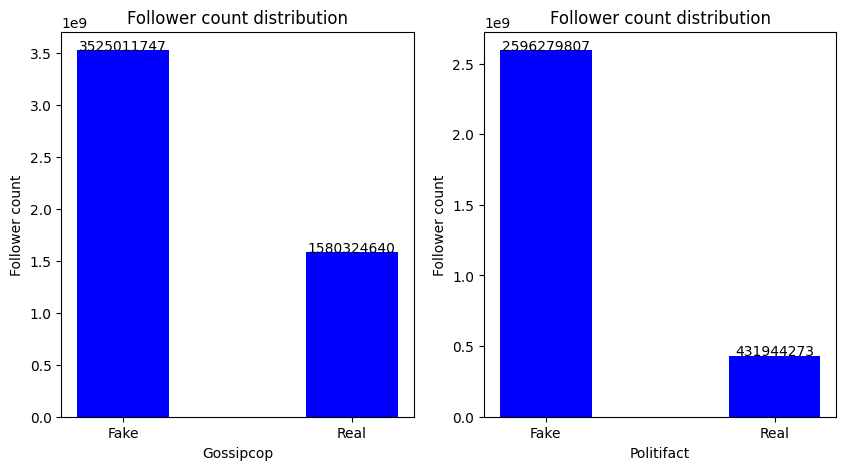

In [12]:
gossipcop_fake_follower_count = gossipcop_df_fake['followers_count'].sum()
gossipcop_real_follower_count = gossipcop_df_real['followers_count'].sum()

politifact_fake_follower_count = politifact_df_fake['followers_count'].sum()
politifact_real_follower_count = politifact_df_real['followers_count'].sum()

dataset_names = ['Fake','Real']
followers_count_list = [gossipcop_fake_follower_count,gossipcop_real_follower_count]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(dataset_names, followers_count_list, color ='blue',width = 0.4)
addlabels(dataset_names, followers_count_list)
plt.title("Follower count distribution")
plt.xlabel("Gossipcop")
plt.ylabel("Follower count")

dataset_names = ['Fake','Real']
followers_count_list = [politifact_fake_follower_count,politifact_real_follower_count]

plt.subplot(1,2,2)
plt.bar(dataset_names, followers_count_list, color ='blue',width = 0.4)
addlabels(dataset_names, followers_count_list)
plt.title("Follower count distribution")
plt.xlabel("Politifact")
plt.ylabel("Follower count")
    
plt.show()

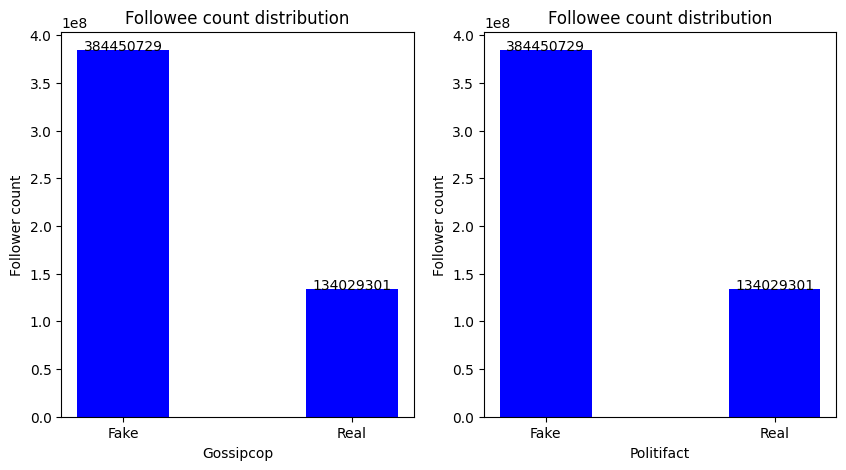

In [13]:
gossipcop_fake_followee_count = gossipcop_df_fake['favourites_count'].sum()
gossipcop_real_followee_count = gossipcop_df_real['favourites_count'].sum()

politifact_fake_followee_count = politifact_df_fake['favourites_count'].sum()
politifact_real_followee_count = politifact_df_real['favourites_count'].sum()

dataset_names = ['Fake','Real']
followee_count_list = [gossipcop_fake_followee_count,gossipcop_real_followee_count]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(dataset_names, followee_count_list, color ='blue',width = 0.4)
addlabels(dataset_names, followee_count_list)
plt.title("Followee count distribution")
plt.xlabel("Gossipcop")
plt.ylabel("Follower count")

dataset_names = ['Fake','Real']
followers_count_list = [politifact_fake_followee_count,politifact_real_followee_count]

plt.subplot(1,2,2)
plt.bar(dataset_names, followee_count_list, color ='blue',width = 0.4)
addlabels(dataset_names, followee_count_list)
plt.title("Followee count distribution")
plt.xlabel("Politifact")
plt.ylabel("Follower count")
    
plt.show()

## 3) Explore the temporal evolution of user’s engagement (according to your suggested approach to quantify the user’s engagement (i.e., number of likes, number of retweets, some combination of followers and followees, etc.) for Fake News and Real News, and draw the corresponding plot for both glossipcop and politifact data.

In [ ]:
'''
Note: Don't run this code cell

import pandas as pd
import matplotlib.pyplot as plt

fake_news = gossipcop_df_fake
real_news = gossipcop_df_real

date_format = '%a %b %d %H:%M:%S +0000 %Y'

fake_news['created_at'] = pd.to_datetime(fake_news['created_at'],format=date_format)
real_news['created_at'] = pd.to_datetime(real_news['created_at'],format=date_format)


fake_engagement = fake_news.groupby(['user_screen_name', pd.Grouper(key='created_at', freq='D')])['favorite_count', 'retweet_count'].sum()
real_engagement = real_news.groupby(['user_screen_name', pd.Grouper(key='created_at', freq='D')])['favorite_count', 'retweet_count'].sum()

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = fake_engagement.copy()

G = nx.Graph()

G.add_nodes_from(df.index.levels[0])

for date in df.index.levels[1]:
    date = str(date).split(' ')[0]
    try:
        date_df = df.loc[pd.IndexSlice[:, date], :]
        for user1, row1 in date_df.iterrows():
            for user2, row2 in date_df.iterrows():
                if user1[0] != user2[0]:
                    weight = row1['favorite_count'] + row2['retweet_count']
                    G.add_edge(user1, user2, weight=weight)
    except:
        continue
        
pos = nx.spring_layout(G)
edge_weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
nx.draw(G, pos, node_size=500, edge_color=edge_weights, width=2, edge_cmap=plt.cm.Blues)
plt.show()
'''

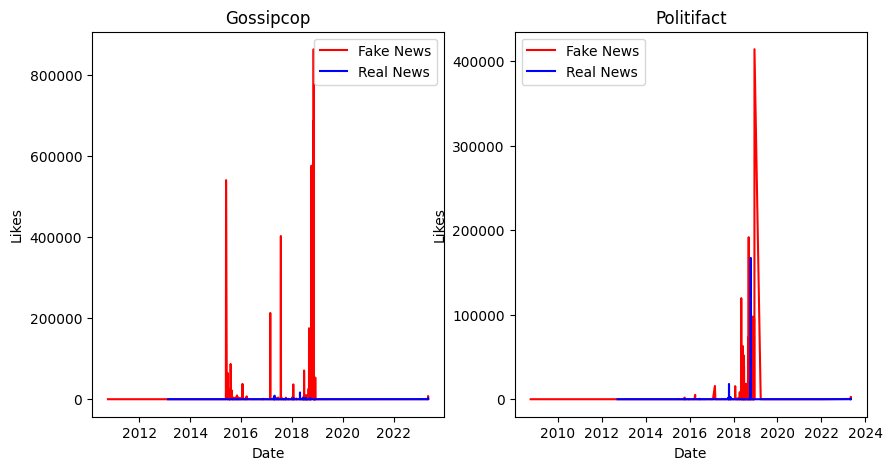

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

date_format = '%a %b %d %H:%M:%S +0000 %Y'

gossipcop_df_fake['created_at'] = pd.to_datetime(gossipcop_df_fake['created_at'],format=date_format)
gossipcop_df_real['created_at'] = pd.to_datetime(gossipcop_df_real['created_at'],format=date_format)

politifact_df_fake['created_at'] = pd.to_datetime(politifact_df_fake['created_at'],format=date_format)
politifact_df_real['created_at'] = pd.to_datetime(politifact_df_real['created_at'],format=date_format)

# Calculate the number of likes per day for fake and real news
glossipcop_fake_retweets = gossipcop_df_fake.groupby(gossipcop_df_fake['created_at'].dt.date)['favorite_count'].sum()
glossipcop_real_retweets = gossipcop_df_real.groupby(gossipcop_df_real['created_at'].dt.date)['favorite_count'].sum()

politifact_fake_retweets = politifact_df_fake.groupby(politifact_df_fake['created_at'].dt.date)['favorite_count'].sum()
politifact_real_retweets = politifact_df_real.groupby(politifact_df_real['created_at'].dt.date)['favorite_count'].sum()

# Plot the timely evolutions of likes for fake and real news
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(glossipcop_fake_retweets.index, glossipcop_fake_retweets, color='red', label='Fake News')
plt.plot(glossipcop_real_retweets.index, glossipcop_real_retweets, color='blue', label='Real News')
plt.title('Gossipcop')
plt.xlabel('Date')
plt.ylabel('Likes')
plt.legend()

plt.subplot(1,2,2)
plt.plot(politifact_fake_retweets.index, politifact_fake_retweets, color='red', label='Fake News')
plt.plot(politifact_real_retweets.index, politifact_real_retweets, color='blue', label='Real News')
plt.title('Politifact')
plt.xlabel('Date')
plt.ylabel('Likes')
plt.legend()

plt.show()

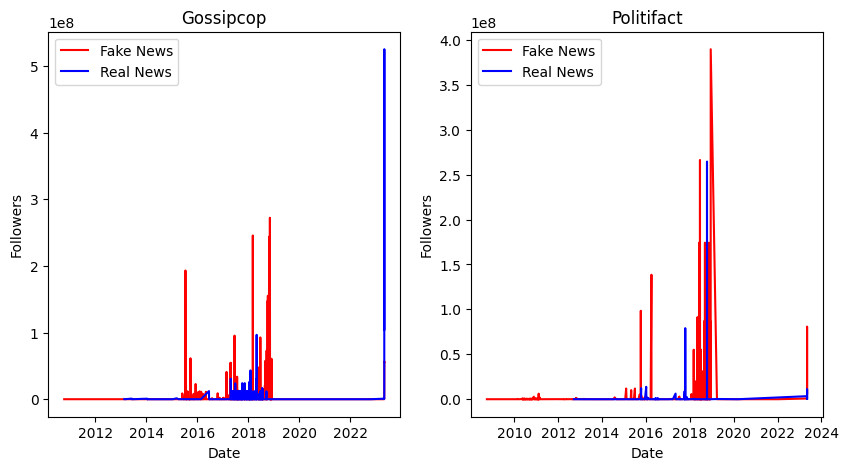

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

date_format = '%a %b %d %H:%M:%S +0000 %Y'

gossipcop_df_fake['created_at'] = pd.to_datetime(gossipcop_df_fake['created_at'],format=date_format)
gossipcop_df_real['created_at'] = pd.to_datetime(gossipcop_df_real['created_at'],format=date_format)

politifact_df_fake['created_at'] = pd.to_datetime(politifact_df_fake['created_at'],format=date_format)
politifact_df_real['created_at'] = pd.to_datetime(politifact_df_real['created_at'],format=date_format)

# Calculate the number of likes per day for fake and real news
glossipcop_fake_retweets = gossipcop_df_fake.groupby(gossipcop_df_fake['created_at'].dt.date)['followers_count'].sum()
glossipcop_real_retweets = gossipcop_df_real.groupby(gossipcop_df_real['created_at'].dt.date)['followers_count'].sum()

politifact_fake_retweets = politifact_df_fake.groupby(politifact_df_fake['created_at'].dt.date)['followers_count'].sum()
politifact_real_retweets = politifact_df_real.groupby(politifact_df_real['created_at'].dt.date)['followers_count'].sum()

# Plot the timely evolutions of likes for fake and real news
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(glossipcop_fake_retweets.index, glossipcop_fake_retweets, color='red', label='Fake News')
plt.plot(glossipcop_real_retweets.index, glossipcop_real_retweets, color='blue', label='Real News')
plt.title('Gossipcop')
plt.xlabel('Date')
plt.ylabel('Followers')
plt.legend()

plt.subplot(1,2,2)
plt.plot(politifact_fake_retweets.index, politifact_fake_retweets, color='red', label='Fake News')
plt.plot(politifact_real_retweets.index, politifact_real_retweets, color='blue', label='Real News')
plt.title('Politifact')
plt.xlabel('Date')
plt.ylabel('Followers')
plt.legend()

plt.show()

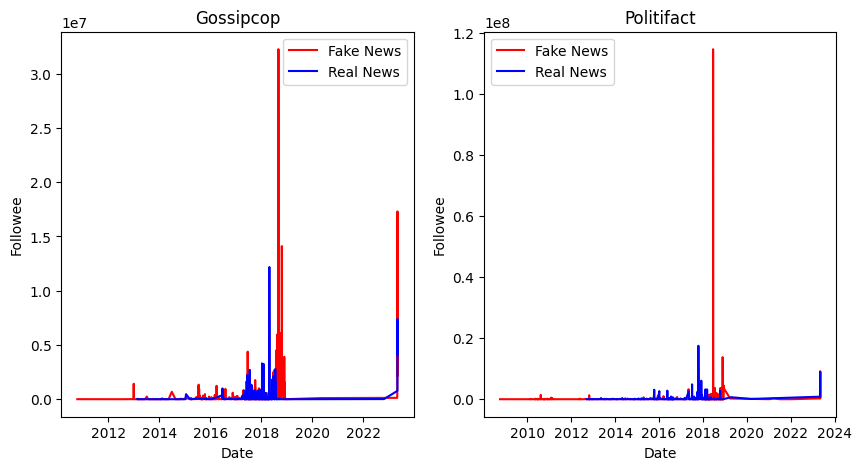

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

date_format = '%a %b %d %H:%M:%S +0000 %Y'

gossipcop_df_fake['created_at'] = pd.to_datetime(gossipcop_df_fake['created_at'],format=date_format)
gossipcop_df_real['created_at'] = pd.to_datetime(gossipcop_df_real['created_at'],format=date_format)

politifact_df_fake['created_at'] = pd.to_datetime(politifact_df_fake['created_at'],format=date_format)
politifact_df_real['created_at'] = pd.to_datetime(politifact_df_real['created_at'],format=date_format)

# Calculate the number of likes per day for fake and real news
glossipcop_fake_retweets = gossipcop_df_fake.groupby(gossipcop_df_fake['created_at'].dt.date)['favourites_count'].sum()
glossipcop_real_retweets = gossipcop_df_real.groupby(gossipcop_df_real['created_at'].dt.date)['favourites_count'].sum()

politifact_fake_retweets = politifact_df_fake.groupby(politifact_df_fake['created_at'].dt.date)['favourites_count'].sum()
politifact_real_retweets = politifact_df_real.groupby(politifact_df_real['created_at'].dt.date)['favourites_count'].sum()

# Plot the timely evolutions of likes for fake and real news
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(glossipcop_fake_retweets.index, glossipcop_fake_retweets, color='red', label='Fake News')
plt.plot(glossipcop_real_retweets.index, glossipcop_real_retweets, color='blue', label='Real News')
plt.title('Gossipcop')
plt.xlabel('Date')
plt.ylabel('Followee')
plt.legend()

plt.subplot(1,2,2)
plt.plot(politifact_fake_retweets.index, politifact_fake_retweets, color='red', label='Fake News')
plt.plot(politifact_real_retweets.index, politifact_real_retweets, color='blue', label='Real News')
plt.title('Politifact')
plt.xlabel('Date')
plt.ylabel('Followee')
plt.legend()

plt.show()

## 4) Botometer test

## 5) We want to explore the graph structure that can be extracted from the dataset and compare the properties of fake news and real news categories. For this purpose, consider the follower relationship, where user id A is linked to user id B if either A (resp. B) is a follower of B (resp. A). We restrict only to those user ids who are associated to dataset tweets (Need to retrieve the list of followers for each user id to test whether this relation holds). Use NetworkX to calculate global attributes of this network such as overall degree centrality, diameter, clustering coefficient, size of largest component. Compare these graph attributes for Fake News and Real News for glossipcop and politifact data. Use high level illustration to draw the network of each one.

In [122]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = gossipcop_df_real.copy()

followers = {}
for user_id in df['user_id_str'].unique():
    followers[user_id] = df[df['user_id_str']==user_id]['followers'].iloc[0]

In [117]:
G = nx.Graph()
for user_id in df['user_id_str'].unique():
    G.add_node(user_id)

In [118]:
for i, user_id1 in enumerate(df['user_id_str'].unique()):
    for j, user_id2 in enumerate(df['user_id_str'].unique()):
        if i < j:
            if user_id1 in followers[user_id2] or user_id2 in followers[user_id1]:
                G.add_edge(user_id1, user_id2)

TypeError: argument of type 'numpy.int64' is not iterable

In [110]:
# Calculate global attributes of the network
print("Overall degree centrality:", nx.degree_centrality(G))
print("Diameter:", nx.diameter(G))
print("Clustering coefficient:", nx.average_clustering(G))
print("Size of largest component:", len(max(nx.connected_components(G), key=len)))

# Draw the network
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show()

Overall degree centrality: {10409622: 0.0, 600811002: 0.0, 2492162263: 0.0, 2471499625: 0.0, 876617664638078976: 0.0, 20587567: 0.0, 16910607: 0.0, 2858595360: 0.0, 981334892: 0.0, 1481143356: 0.0, 25482342: 0.0, 2418608678: 0.0, 528829450: 0.0, 895253109395648512: 0.0, 844978796339986433: 0.0, 846639835246817280: 0.0, 713385903461367809: 0.0, 839505781942800384: 0.0, 839728591143231488: 0.0, 844986870144483328: 0.0, 839743041384538112: 0.0, 839772590252048384: 0.0, 839355885616939010: 0.0, 845110951737098240: 0.0, 4889543384: 0.0, 713061197411692544: 0.0, 844973417447112704: 0.0, 844923340909428736: 0.0, 709139627114889218: 0.0, 4874979999: 0.0, 4889604194: 0.0, 839815575538827264: 0.0, 839708192179437568: 0.0, 839519945180524544: 0.0, 840524255024492544: 0.0, 846648532274601984: 0.0, 844951679921537024: 0.0, 839789279916126209: 0.0, 844966877075927040: 0.0, 844956696871026688: 0.0, 907313871408349184: 0.0, 909654267702607872: 0.0, 705108363386945536: 0.0, 791278963419181056: 0.0, 199

NetworkXError: Found infinite path length because the graph is not connected

## 6) Draw on the same plot the degree distribution of fake news and real news for each of glossipcop and politifact data. Conclude whether some graph attributes are relevant to distinguish fake news and real news.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = politifact_df_real.copy()

followers = {}
for user_id in df['user_id'].unique():
    followers[user_id] = df[df['user_id']==user_id]['followers'].iloc[0]

G_fake = nx.Graph()
G_real = nx.Graph()
for user_id in df['user_id'].unique():
    if df[df['user_id']==user_id]['type'].iloc[0] == 'fake':
        G = G_fake
    else:
        G = G_real
    G.add_node(user_id)
for i, user_id1 in enumerate(df['user_id'].unique()):
    for j, user_id2 in enumerate(df['user_id'].unique()):
        if i < j:
            if user_id1 in followers[user_id2] or user_id2 in followers[user_id1]:
                if df[df['user_id']==user_id1]['type'].iloc[0] == 'fake':
                    G = G_fake
                else:
                    G = G_real
                G.add_edge(user_id1, user_id2)

degree_sequence_fake = sorted([d for n, d in G_fake.degree()], reverse=True)  
degree_sequence_real = sorted([d for n, d in G_real.degree()], reverse=True)  

plt.loglog(degree_sequence_fake, 'b-', marker='o')
plt.loglog(degree_sequence_real, 'r-', marker='o')

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend(['Fake News', 'Real News'])

plt.show()

### Note: We cannot able to complete tasks 4, 5, and 6 because of the twitter API. In task 4 we tasked to test the tweet ids using botometer where we cannot able to use that with out twitter API and to find an alternative for that requires a bit more time. For tasks 5 and 6 we need followers ids and again we cannot able to extract the list using the stweet library. TA has suggested the javascript scraper to extract the list but we kinda need one more day to analyse that part. But I have written a sample code how to create the structured graph for the followers in the above cells.

## 7) We want to check the spread of information in both fake news and real news dataset. For this purpose, extract date attributes for the retweets and compare the timely evolutions of retweets in both real and fake news dataset. Conclude about the comparison between the two scenarios.

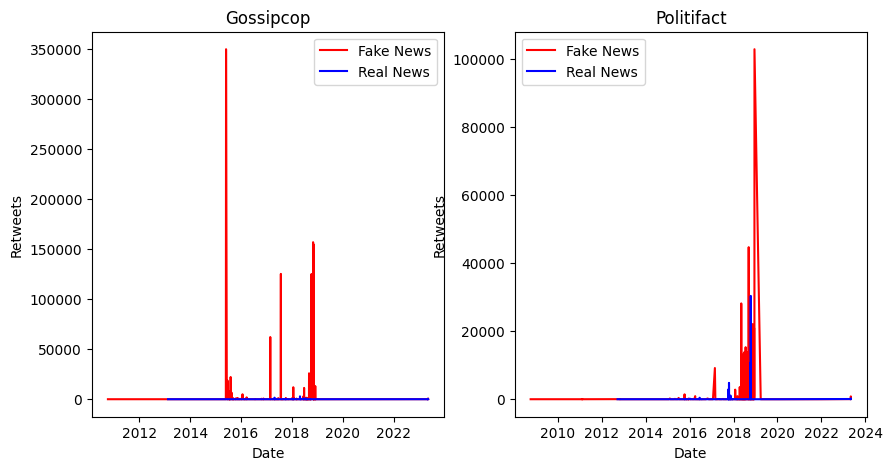

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

date_format = '%a %b %d %H:%M:%S +0000 %Y'

gossipcop_df_fake['created_at'] = pd.to_datetime(gossipcop_df_fake['created_at'],format=date_format)
gossipcop_df_real['created_at'] = pd.to_datetime(gossipcop_df_real['created_at'],format=date_format)

politifact_df_fake['created_at'] = pd.to_datetime(politifact_df_fake['created_at'],format=date_format)
politifact_df_real['created_at'] = pd.to_datetime(politifact_df_real['created_at'],format=date_format)

# Calculate the number of retweets per day for fake and real news
glossipcop_fake_retweets = gossipcop_df_fake.groupby(gossipcop_df_fake['created_at'].dt.date)['retweet_count'].sum()
glossipcop_real_retweets = gossipcop_df_real.groupby(gossipcop_df_real['created_at'].dt.date)['retweet_count'].sum()

politifact_fake_retweets = politifact_df_fake.groupby(politifact_df_fake['created_at'].dt.date)['retweet_count'].sum()
politifact_real_retweets = politifact_df_real.groupby(politifact_df_real['created_at'].dt.date)['retweet_count'].sum()

# Plot the timely evolutions of retweets for fake and real news
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(glossipcop_fake_retweets.index, glossipcop_fake_retweets, color='red', label='Fake News')
plt.plot(glossipcop_real_retweets.index, glossipcop_real_retweets, color='blue', label='Real News')
plt.title('Gossipcop')
plt.xlabel('Date')
plt.ylabel('Retweets')
plt.legend()

plt.subplot(1,2,2)
plt.plot(politifact_fake_retweets.index, politifact_fake_retweets, color='red', label='Fake News')
plt.plot(politifact_real_retweets.index, politifact_real_retweets, color='blue', label='Real News')
plt.title('Politifact')
plt.xlabel('Date')
plt.ylabel('Retweets')
plt.legend()

plt.show()